In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

import os
import sys
import matplotlib.pyplot as plt
from pandas_ml_utils import FeaturesAndLabels
from pandas_ml_quant import pd, np

automatically imported pandas_ml_utils 0.1.1


A very basic plot of a financial data frame can be achieved by calling `ta_plot` with all its defaults

passed item was None


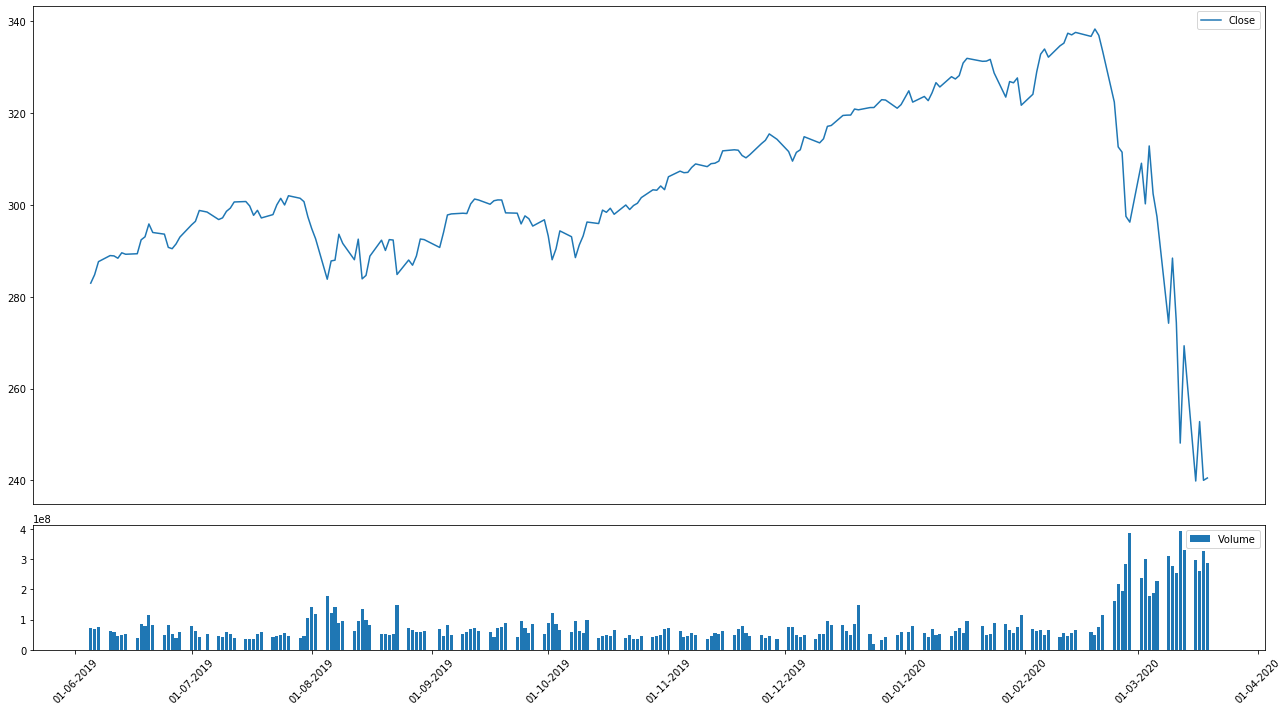

In [4]:
df = pd.read_ts_csv("data/SPY.csv")[-200:]
df.q.ta_plot()()

If we want to plot all indicators which are available we could do this as well

passed item was None


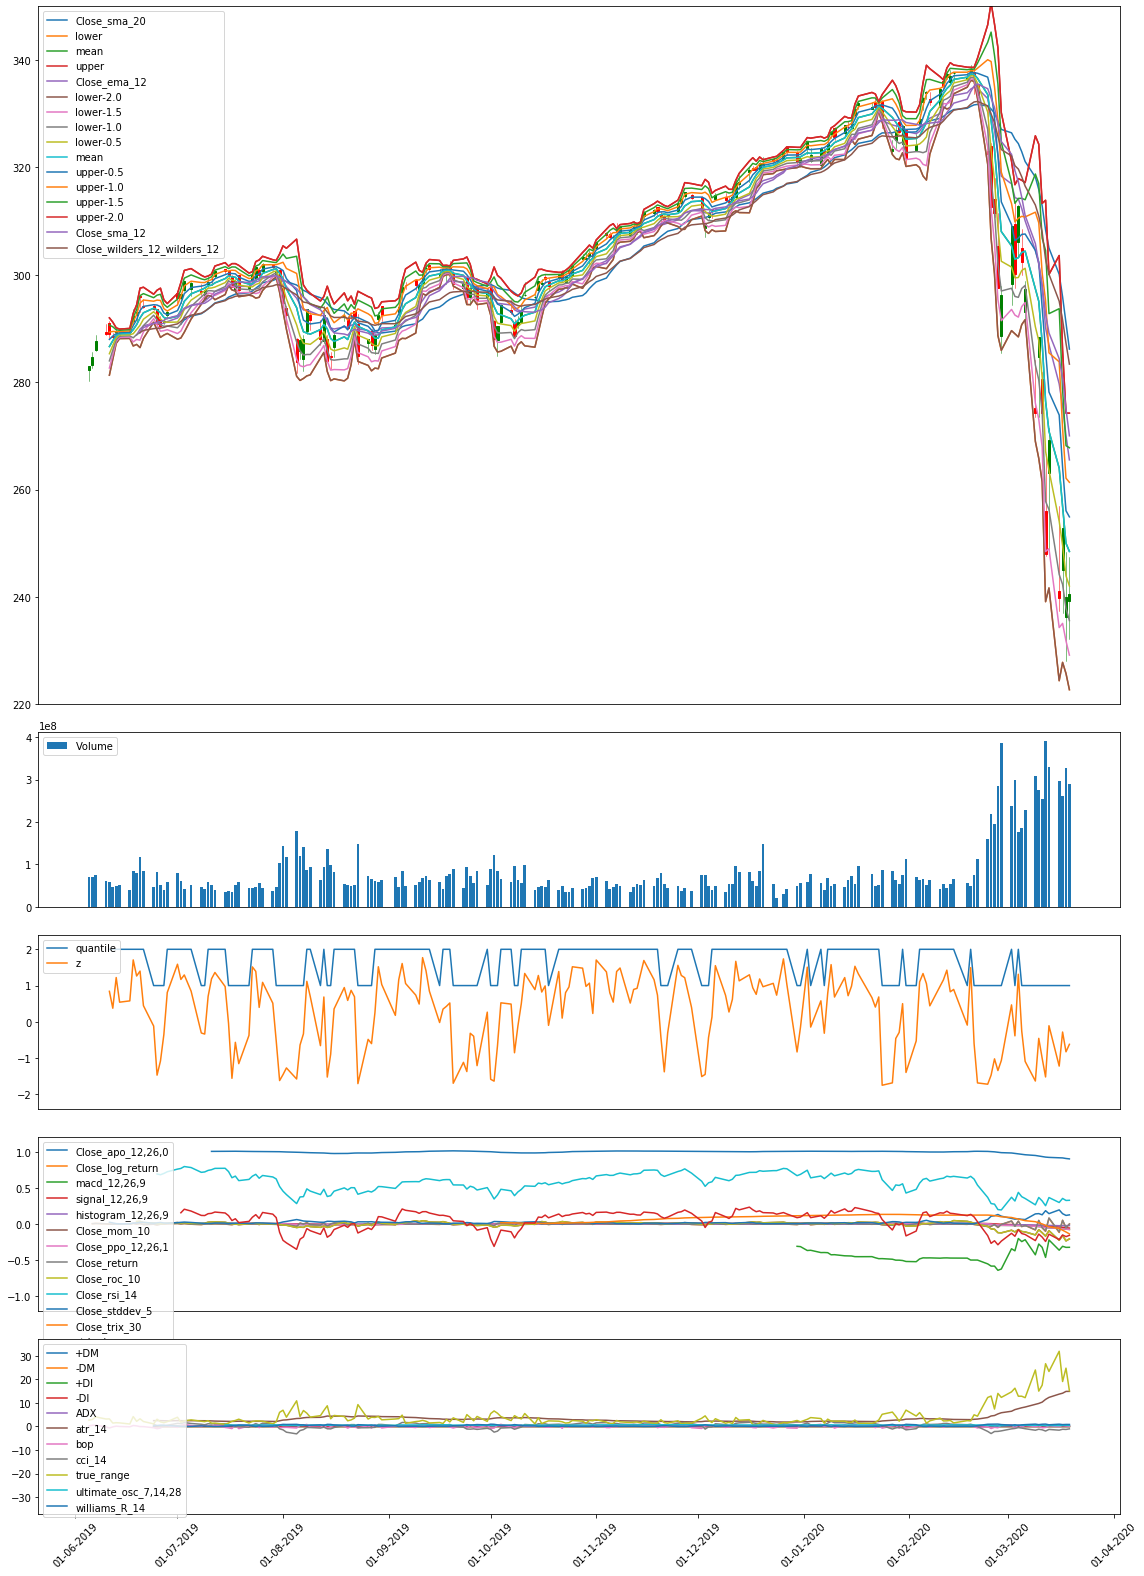

In [18]:
import pandas_ml_quant.analysis.filters as filters
import pandas_ml_quant.analysis.indicators.single_object as simple_indicators
import pandas_ml_quant.analysis.indicators.multi_object as ohlc_indicators


df = pd.read_ts_csv("data/SPY.csv")[-200:]
qp = df.q.ta_plot(5, 1, figsize=(16, 22))
qp.candlestick()
qp.line(df["Close"].q.ta_sma(period=20))
qp.bar("Volume", panel=1)

for indicator in dir(filters):
    if indicator.startswith("ta_"):
        x = getattr(df["Close"].q, indicator)()
        if isinstance(x, pd.DataFrame):
            panel2 = x.max() < x.min().max()
            qp.line(x[x.columns[~panel2]], panel=0)
            if len(x.columns[panel2]) > 0:
                qp.line(x[x.columns[panel2]], panel=2)
        else:
            qp.line(x, panel=0)

for indicator in dir(simple_indicators):
    if indicator.startswith("ta_"):
        x = getattr(df["Close"].q, indicator)()
        qp.line(x, panel=3)

for indicator in dir(ohlc_indicators):
    if indicator.startswith("ta_"):
        x = getattr(df.q, indicator)()
        qp.line(x, panel=4)

qp.set_scale(0, 220, 350)
qp.with_symetric_scale(2, 3, 4)
qp.with_legend()

We can also plot some more fancy stuff like a Gramian Anglar Field and animate those plots over time

In [4]:
df["Close"].q.ta_rnn(24).q.ta_gaf()[-20:].q.ta_plot().plot_matrix_animation('Close_gaf')

No handles with labels found to put in legend.
No handles with labels found to put in legend.


But we can also explore our feature space which is not only related to financial data. We just pass a `FeaturesAndLabels` object which is the main data definition needed for any statistical model ind the pandas-ml-utils space. 

passed item was None
passed item was None


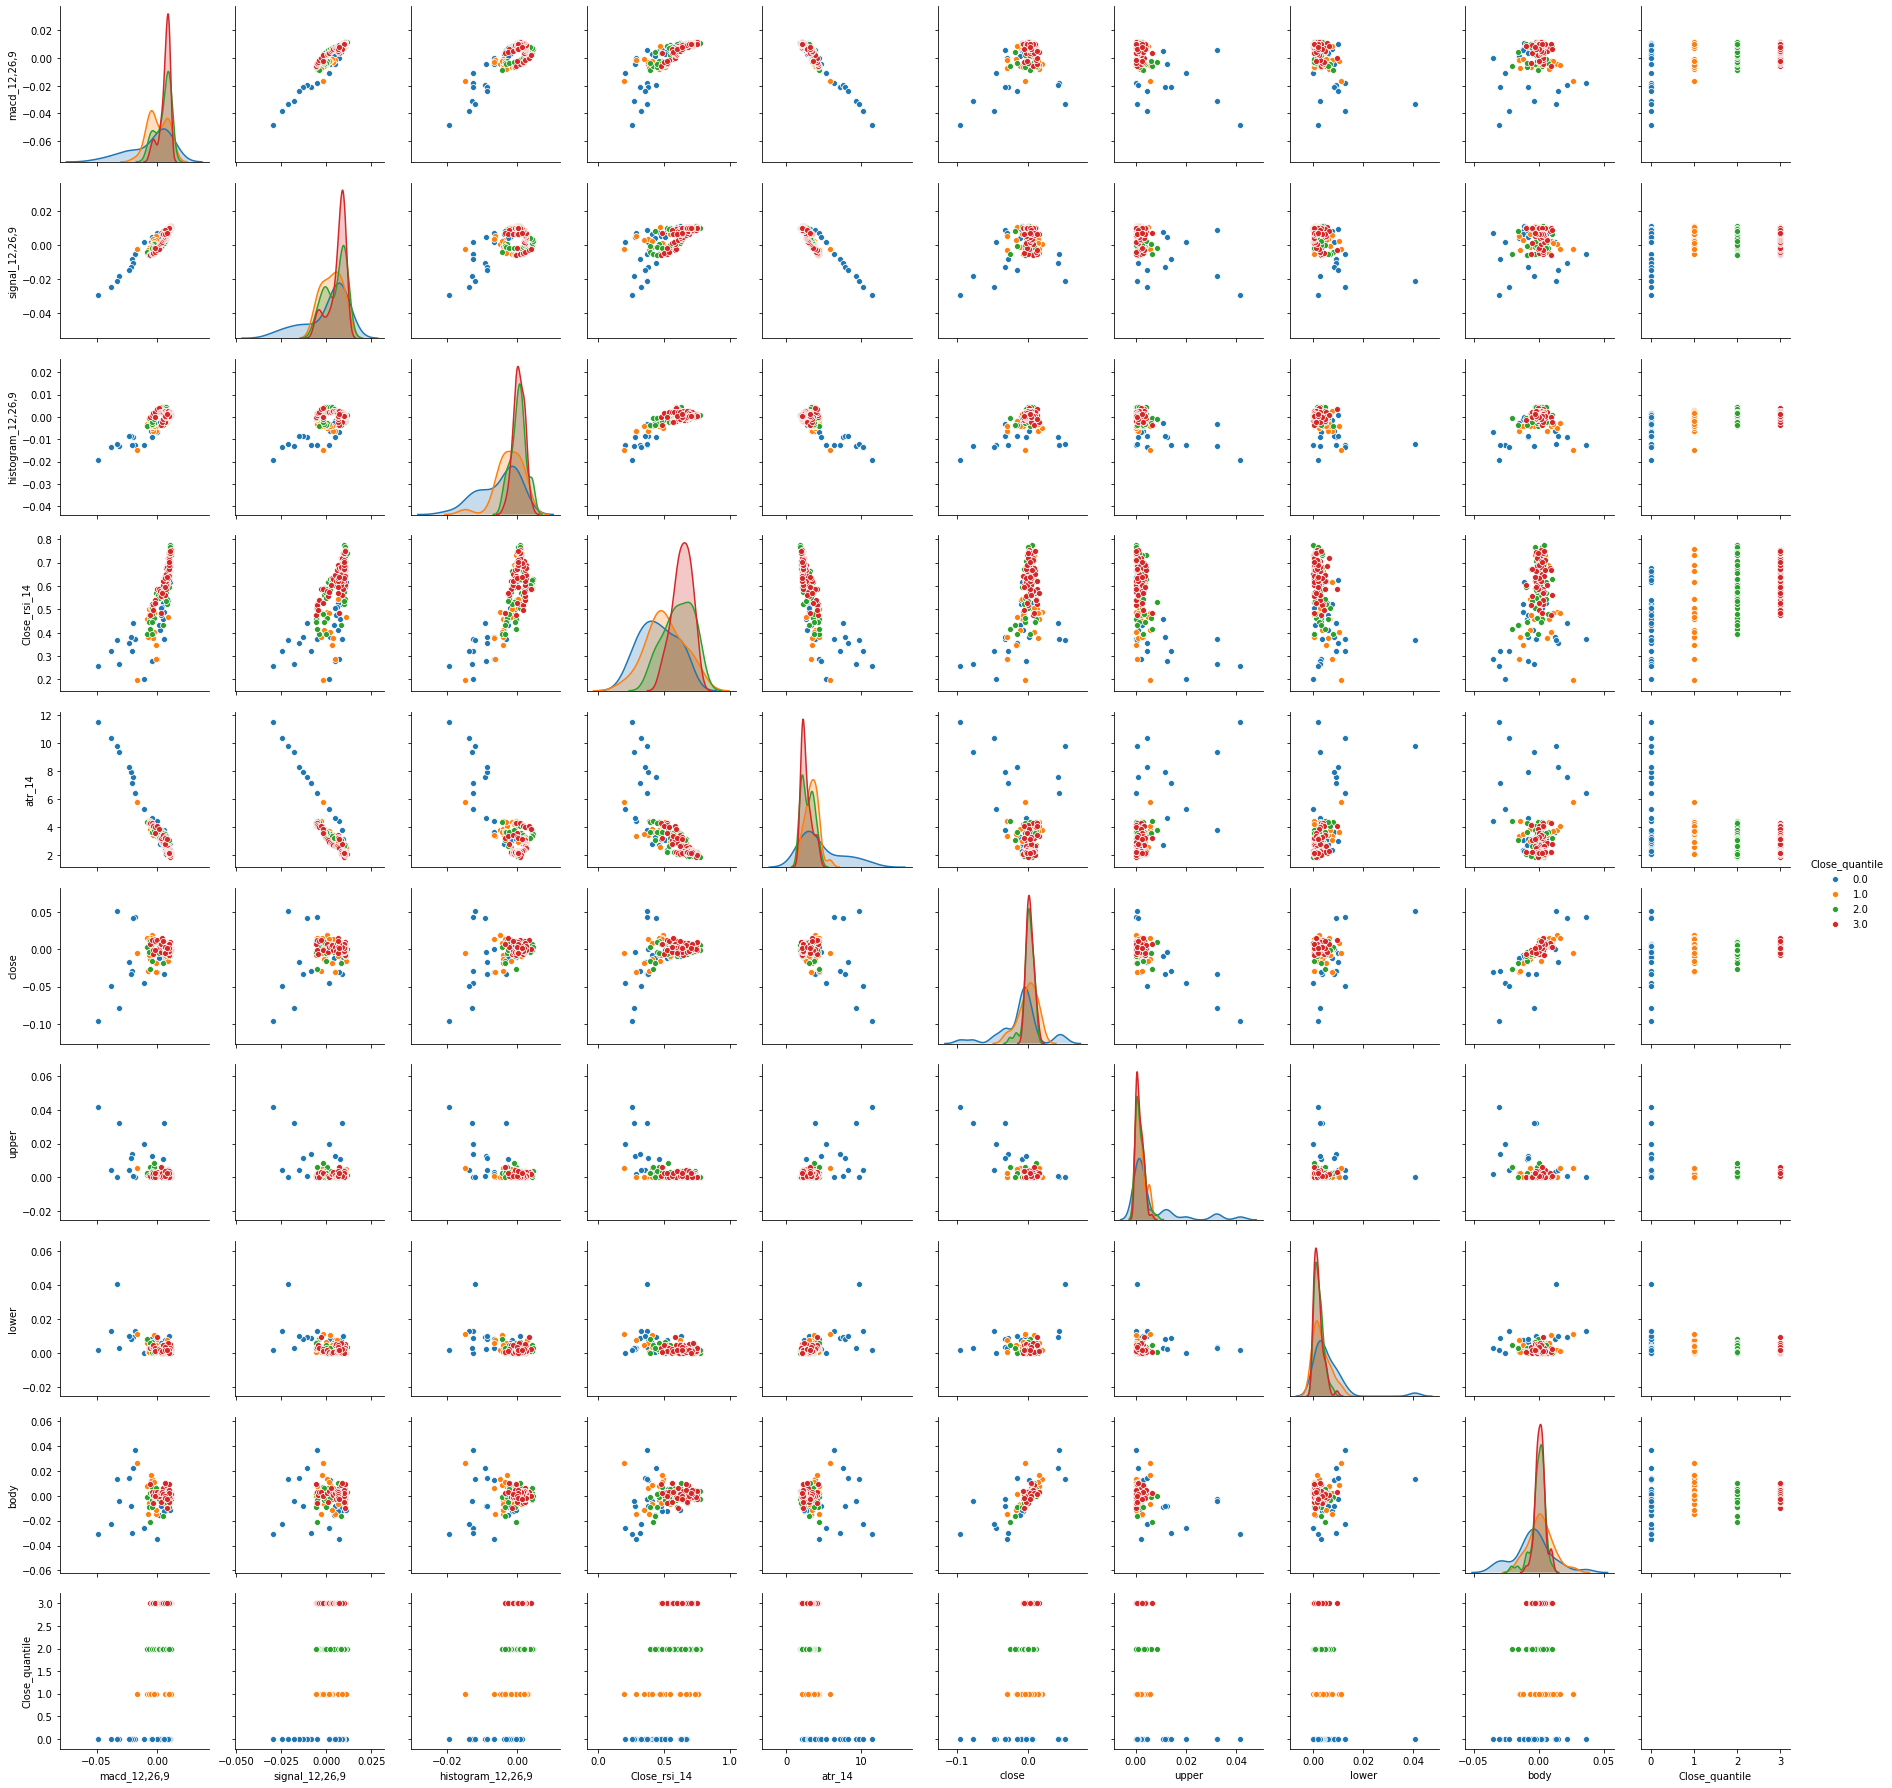

In [5]:
df.model.plot_features(
    FeaturesAndLabels(
        features=[
            lambda df: df["Close"].q.ta_macd(),
            lambda df: df["Close"].q.ta_rsi(),
            lambda df: df.q.ta_atr(),
            lambda df: df.q.ta_candles_as_culb(relative_close=True),
        ],
        labels=[
            lambda df: df["Close"].q.ta_future_bband_quantile(include_mean=True)
        ]
    )
)
